In [1]:
import os
import pandas as pd
import numpy as np
import cv2  # conda install -c conda-forge opencv
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = (6, 3)
plt.rcParams['axes.grid'] = False
plt.rcParams["axes.spines.top"] = False
plt.rcParams["axes.spines.right"] = False
plt.rcParams["font.size"] = 12
plt.rcParams["savefig.bbox"] = "tight"
plt.rcParams['figure.facecolor'] = 'white'

In [2]:
stats_path = "./data/results/stats/feature_extraction/"
csv_filenames = sorted([f for f in os.listdir(stats_path) if f.endswith(".csv")])
l=list()
dfs = []
for nth, fn in enumerate(csv_filenames):
    df_tmp = pd.read_csv(os.path.join(stats_path, fn)).reset_index(drop=True)#.dropna(subset="centroid_x")
    perimeter = df_tmp.perimeter.to_numpy()
    df_tmp["peri_zscore"] = (perimeter - np.mean(perimeter)) / np.std(perimeter)
    df_tmp["exp"] = int(nth)
    l.append(len(df_tmp))
    dfs.append(df_tmp)

del df_tmp
print(len(dfs), sum(l))

14508

In [3]:
SAVE_DF = False
df = pd.concat(dfs, ignore_index=True)
df.to_csv(f"./data/results/egocentric_all_stats.csv", index=False) if SAVE_DF else None

In [8]:
LOAD_DF = True
df = pd.read_csv(f"./data/results/egocentric_all_stats.csv") if LOAD_DF else df
exp_names = df.groupby("exp")["img_fp"].first()
print(len(df), len(exp_names))

exp_names = [en.split("/")[3] for en in exp_names]
exp_names

14508 20


['2024_0201_152845_091_10sec',
 '2024_0201_152845_091_subclip_7sec_ts98-te105_cropped',
 '2024_0216_094236_090_11sec_cropped',
 '2024_0216_161747_055_20sec_cropped',
 '2024_0311_152452_018_trimmed_15sec_ts0-te15_cropped_700-2100-400-1800',
 '2024_0311_153344_021_trimmed_10sec_ts28-te38_cropped_1050-1800-800-2000',
 '2024_0312_194950_050_trimmed',
 '2024_0312_200031_053_trimmed_15sec_ts74-te89_cropped_250-1250-0-1100',
 '2024_0322_170346_054_trimmed',
 '2024_0324_204541_027_trimmed',
 '2024_0328_094441_053_trimmed',
 '2024_0330_120233_097_trimmed',
 '2024_0330_120947_101_trimmed',
 '2024_0330_121516_105_trimmed',
 '2024_0330_122058_107_trimmed_ts6-te120',
 '2024_0331_091926_007_trimmed',
 '2024_0408_074310_021',
 '2024_0415_084257_008_trimmed',
 '2024_0512_085355_018_trimmed',
 '2024_0512_091209_023_trimmed']

In [ ]:
(24, 315, 1668, 1084)
(24, 168, 1530, 550)
(30, 330, 1920, 800)  # what here: mpp_fhd, fps60_factor
(24, 480, 1850, 850)
(24, 360, 1400, 1400)
(24, 240, 750, 1200)
(24, 994, 2880, 2160)
(24, 360, 1000, 1100)
(60, 1833, 1920, 1080)
(24, 944, 2880, 2160)
(60, 1722, 1920, 1080)
(60, 973, 1920, 1080)
(60, 576, 1920, 1080)
(60, 1746, 1920, 1080)

(60, many, 1920,1080)

(60, 685, 1920, 1080)
(60, 774, 1920, 1080)
(60, 2119, 1920, 1080)
(60, 1824, 1920, 1080)
(60, 3307, 1920, 1080)

In [23]:
mpp_fhd = 1.65  # microns_per_pixel
mpp_uhd = 2.5
fps24_factor = 1.25 
fps60_factor = 2

mpps = [mpp_uhd, mpp_uhd, mpp_fhd, mpp_uhd, mpp_uhd, mpp_uhd, mpp_uhd, mpp_uhd, mpp_fhd, mpp_uhd, mpp_fhd, mpp_fhd, mpp_fhd, mpp_fhd, mpp_fhd, mpp_fhd, mpp_fhd, mpp_fhd, mpp_fhd, mpp_fhd]
fpss = [fps24_factor, fps24_factor, fps60_factor, fps24_factor, fps24_factor, fps24_factor, fps24_factor, fps24_factor, fps60_factor, fps24_factor, fps60_factor, fps60_factor, fps60_factor, fps60_factor, fps60_factor, fps60_factor, fps60_factor, fps60_factor, fps60_factor, fps60_factor]
#(signal / mpp) * fps

print(len(mpps), len(fpss))

# Add mpp and fps values to the dataframe
df['mpp'] = [mpps[i % len(mpps)] for i in range(len(df))]
df['fps'] = [fpss[i % len(fpss)] for i in range(len(df))]

# Normalize the signal
df['nperimeter'] = (df["perimeter"] / df['mpp'])
df['ncentroid_dist'] = (df["centroid_dist"] / df['mpp']) * df['fps']

df.to_csv(f"./data/results/egocentric_all_stats_normalized.csv", index=False)# if SAVE_DF else None

20 20


139.47047519683838


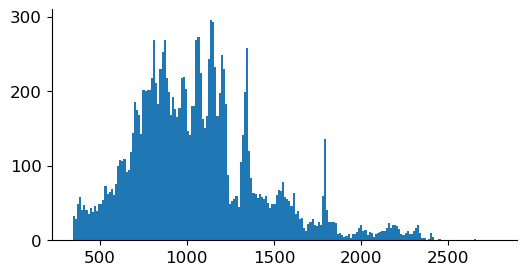

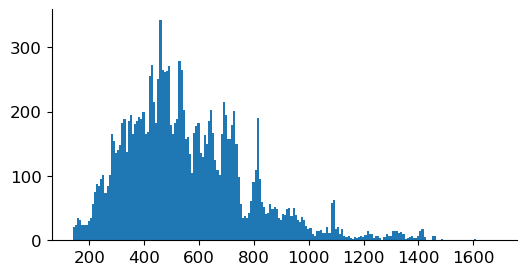

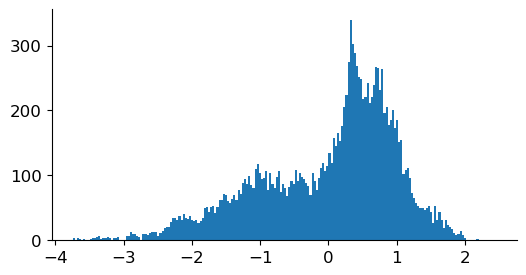

In [14]:
print(min(df.nperimeter))
plt.figure()
plt.hist(df.perimeter, bins=200);

plt.figure()
plt.hist(df.nperimeter, bins=200);

plt.figure()
plt.hist(df.peri_zscore, bins=200);

# plt.figure()
# plt.hist(df.centroid_dist, bins=np.arange(0,30,1));

(0.0, 30.0)

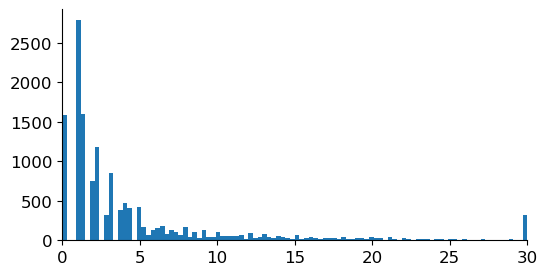

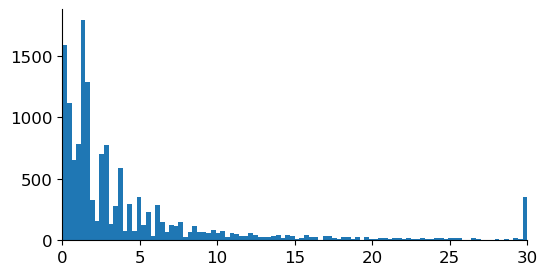

In [22]:
upper_clip = 30
plt.figure()
plt.hist(df.centroid_dist.fillna(0).clip(lower=0, upper=upper_clip), bins=100);
plt.xlim(0,upper_clip)

plt.figure()
plt.hist(df.ncentroid_dist.fillna(0).clip(lower=0, upper=upper_clip), bins=100);
plt.xlim(0,upper_clip)

344.1909068822861


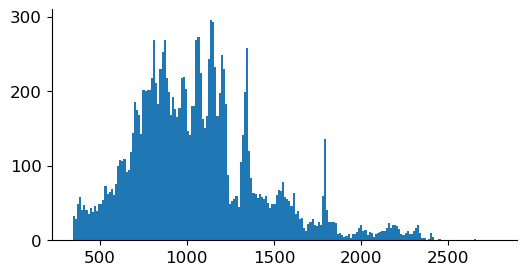

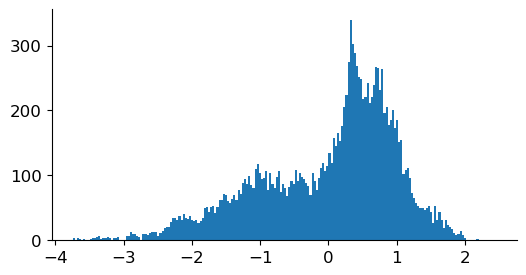

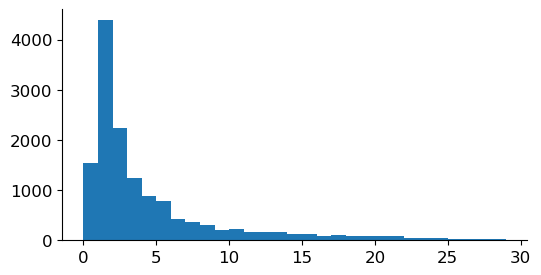

In [8]:
# still needs normalization ie mpp
# centroid distance can still include movements!
print(min(df.perimeter))
plt.figure()
plt.hist(df.perimeter, bins=200);

plt.figure()
plt.hist(df.peri_zscore, bins=200);

plt.figure()
plt.hist(df.centroid_dist, bins=np.arange(0,30,1));

/var/folders/l1/s9h8bddx0mv1bqzrqffsxhp00000gn/T/ipykernel_63579/2428445573.py:6: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  plt.colorbar(smap, shrink=.2)


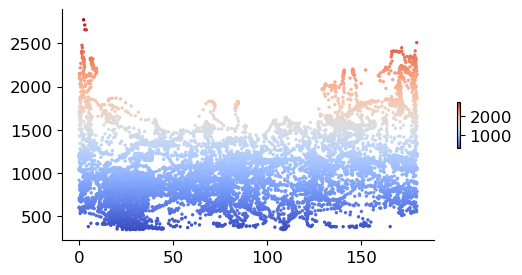

In [13]:
from utils.utils import create_scalarmappable
c, smap = create_scalarmappable("coolwarm", df.perimeter.to_numpy())

fig, ax = plt.subplots()
ax.scatter(df.orientation, df.perimeter, marker="o", s=2, c=c)
plt.colorbar(smap, shrink=.2)

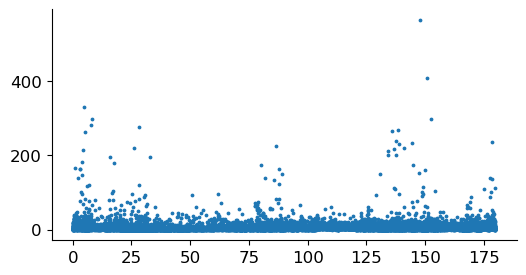

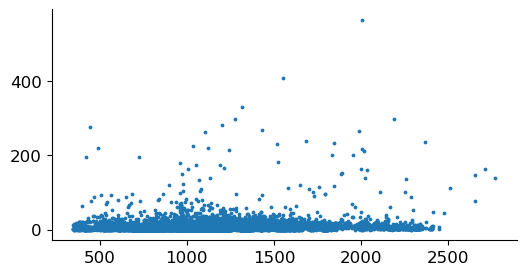

In [14]:
plt.figure()
plt.scatter(df.orientation, df.centroid_dist, marker="o", s=3)

plt.figure()
plt.scatter(df.perimeter, df.centroid_dist, marker="o", s=3)